# Zarr ECCO ds - cleaned version

In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import gcsfs
import dask
import dask.array as dsa
import numpy as np
import intake
import fsspec
import xmitgcm
from xmitgcm.llcreader.llcmodel import faces_dataset_to_latlon
%matplotlib inline

/srv/conda/envs/notebook/lib/python3.7/site-packages/intake/source/discovery.py:136: FutureWarning: The drivers ['geojson', 'postgis', 'shapefile', 'spatialite'] do not specify entry_points and were only discovered via a package scan. This may break in a future release of intake. The packages should be updated.
  FutureWarning)


In [2]:
ds = xr.open_zarr(gcsfs.GCSFileSystem(requester_pays=True).get_mapper('pangeo-ecco-eccov4r3/eccov4r3'), consolidated=True)
ds

<xarray.Dataset>
Dimensions:    (face: 13, i: 90, i_g: 90, j: 90, j_g: 90, k: 50, k_l: 50, k_p1: 51, k_u: 50, time: 288, time_snp: 287)
Coordinates:
    Depth      (face, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    PHrefC     (k) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    PHrefF     (k_p1) float32 dask.array<chunksize=(51,), meta=np.ndarray>
    XC         (face, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    XG         (face, j_g, i_g) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    YC         (face, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    YG         (face, j_g, i_g) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    Z          (k) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    Zl         (k_l) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    Zp1        (k_p1) float32 dask.array<chunksize=(51,), meta=np.ndarray>
    Zu         (k_u) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    drC        (k_p1) float32 dask.array<chunksize=(51,), meta=np.ndarray>
    drF        (k) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    dxC        (face, j, i_g) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    dxG        (face, j_g, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    dyC        (face, j_g, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    dyG        (face, j, i_g) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
  * face       (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    hFacC      (k, face, j, i) float32 dask.array<chunksize=(50, 13, 90, 90), meta=np.ndarray>
    hFacS      (k, face, j_g, i) float32 dask.array<chunksize=(50, 13, 90, 90), meta=np.ndarray>
    hFacW      (k, face, j, i_g) float32 dask.array<chunksize=(50, 13, 90, 90), meta=np.ndarray>
  * i          (i) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i_g        (i_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
    iter       (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
    iter_snp   (time_snp) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * j          (j) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j_g        (j_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k          (k) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_l        (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_p1       (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 42 43 44 45 46 47 48 49 50
  * k_u        (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
    rA         (face, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    rAs        (face, j_g, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    rAw        (face, j, i_g) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    rAz        (face, j_g, i_g) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
  * time       (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
  * time_snp   (time_snp) datetime64[ns] 1992-02-01 1992-03-01 ... 2015-12-01
Data variables:
    ADVr_SLT   (time, k_l, face, j, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVr_TH    (time, k_l, face, j, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVx_SLT   (time, k, face, j, i_g) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVx_TH    (time, k, face, j, i_g) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVy_SLT   (time, k, face, j_g, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVy_TH    (time, k, face, j_g, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    DFrE_SLT   (time, k_l, face, j, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    DFrE_TH    (time, k_l, face, j, i) float32 das

In [3]:
dt = ds.time_snp[1:].load()
dt.values = [float(t)/10**9 for t in np.diff(ds.time_snp)]
#rename time (and iter axis)
dt = dt.rename({'time_snp':'time'})
# time axis of dt should be the same as of the monthly averages
dt.time.values = ds.time[1:-1].values
#dt.time.values = ds.time.values[1:-1] 
#add nans to dt to change size form 286 to 288

ds = ds.assign_coords(dt=dt)
ds.dt.attrs = {'units': 's','standard_name': 'dt','coordinate': 'time','long_name': 'time span between snapshots'}

#should I just add nans as first and last value?

In [4]:
ds_ll = faces_dataset_to_latlon(ds)
ds_ll

<xarray.Dataset>
Dimensions:    (face: 13, i: 360, i_g: 360, j: 270, j_g: 270, k: 50, k_l: 50, k_p1: 51, k_u: 50, time: 288, time_snp: 287)
Coordinates:
  * j          (j) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * j_g        (j_g) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * time_snp   (time_snp) datetime64[ns] 1992-02-01 1992-03-01 ... 2015-12-01
  * k_u        (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * i          (i) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * k_l        (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * time       (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
  * i_g        (i_g) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * face       (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * k_p1       (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 42 43 44 45 46 47 48 49 50
  * k          (k) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
    Depth      (j, i) float32 dask.array<chunksize=(90, 90), meta=np.ndarray>
    PHrefC     (k) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    PHrefF     (k_p1) float32 dask.array<chunksize=(51,), meta=np.ndarray>
    XC         (j, i) float32 dask.array<chunksize=(90, 90), meta=np.ndarray>
    XG         (j_g, i_g) float32 dask.array<chunksize=(90, 90), meta=np.ndarray>
    YC         (j, i) float32 dask.array<chunksize=(90, 90), meta=np.ndarray>
    YG         (j_g, i_g) float32 dask.array<chunksize=(90, 90), meta=np.ndarray>
    Z          (k) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    Zl         (k_l) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    Zp1        (k_p1) float32 dask.array<chunksize=(51,), meta=np.ndarray>
    Zu         (k_u) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    drC        (k_p1) float32 dask.array<chunksize=(51,), meta=np.ndarray>
    drF        (k) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    hFacC      (k, j, i) float32 dask.array<chunksize=(50, 90, 90), meta=np.ndarray>
    hFacS      (k, j_g, i) float32 dask.array<chunksize=(50, 90, 90), meta=np.ndarray>
    hFacW      (k, j, i_g) float32 dask.array<chunksize=(50, 90, 90), meta=np.ndarray>
    iter       (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
    iter_snp   (time) float64 nan 1.428e+03 2.172e+03 ... 2.096e+05 nan
    rA         (j, i) float32 dask.array<chunksize=(90, 90), meta=np.ndarray>
    rAs        (j_g, i) float32 dask.array<chunksize=(90, 90), meta=np.ndarray>
    rAw        (j, i_g) float32 dask.array<chunksize=(90, 90), meta=np.ndarray>
    rAz        (j_g, i_g) float32 dask.array<chunksize=(90, 90), meta=np.ndarray>
    dt         (time) float64 nan 2.506e+06 2.678e+06 ... 2.592e+06 nan
    dxC        (j, i_g) float32 dask.array<chunksize=(90, 90), meta=np.ndarray>
    dyC        (j_g, i) float32 dask.array<chunksize=(1, 90), meta=np.ndarray>
    dyG        (j, i_g) float32 dask.array<chunksize=(90, 90), meta=np.ndarray>
    dxG        (j_g, i) float32 dask.array<chunksize=(1, 90), meta=np.ndarray>
Data variables:
    ADVr_SLT   (time, k_l, j, i) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    ADVr_TH    (time, k_l, j, i) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    DFrE_SLT   (time, k_l, j, i) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    DFrE_TH    (time, k_l, j, i) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    DFrI_SLT   (time, k_l, j, i) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    DFrI_TH    (time, k_l, j, i) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    ETAN       (time, j, i) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    ETAN_snp   (time_snp, j, i) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    GEOFLX     (j, i) float32 dask.array<chunksize=(90, 90), meta=np.ndarray>
    SALT       (time, k, j, i) float32 dask.array<

In [5]:
ds_ll_drop = ds_ll.drop(['i', 'j', 'i_g', 'j_g']) #, 'k', 'k_u', 'k_l', 'k_p1'])

In [6]:
# a trick to make things work a bit faster
coords = ds_ll_drop.coords.to_dataset().reset_coords().roll(i=100, i_g=100)
ds = ds_ll_drop.reset_coords(drop=True).roll(i=100, i_g=100)
ds

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  This is separate from the ipykernel package so we can avoid doing imports until


<xarray.Dataset>
Dimensions:    (face: 13, i: 360, i_g: 360, j: 270, j_g: 270, k: 50, k_l: 50, k_p1: 51, k_u: 50, time: 288, time_snp: 287)
Coordinates:
  * time_snp   (time_snp) datetime64[ns] 1992-02-01 1992-03-01 ... 2015-12-01
  * k_u        (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_l        (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * time       (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
  * face       (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * k_p1       (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 42 43 44 45 46 47 48 49 50
  * k          (k) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
Dimensions without coordinates: i, i_g, j, j_g
Data variables:
    ADVr_SLT   (time, k_l, j, i) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    ADVr_TH    (time, k_l, j, i) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    DFrE_SLT   (time, k_l, j, i) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    DFrE_TH    (time, k_l, j, i) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    DFrI_SLT   (time, k_l, j, i) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    DFrI_TH    (time, k_l, j, i) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    ETAN       (time, j, i) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    ETAN_snp   (time_snp, j, i) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    GEOFLX     (j, i) float32 dask.array<chunksize=(90, 90), meta=np.ndarray>
    SALT       (time, k, j, i) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    SALT_snp   (time_snp, k, j, i) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    SFLUX      (time, j, i) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    TFLUX      (time, j, i) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    THETA      (time, k, j, i) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    THETA_snp  (time_snp, k, j, i) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    WVELMASS   (time, k_l, j, i) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    oceFWflx   (time, j, i) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    oceQsw     (time, j, i) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    oceSPtnd   (time, k, j, i) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    ADVx_SLT   (time, k, j, i_g) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    ADVy_SLT   (time, k, j_g, i) float32 dask.array<chunksize=(1, 50, 1, 90), meta=np.ndarray>
    ADVx_TH    (time, k, j, i_g) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    ADVy_TH    (time, k, j_g, i) float32 dask.array<chunksize=(1, 50, 1, 90), meta=np.ndarray>
    DFxE_SLT   (time, k, j, i_g) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    DFyE_SLT   (time, k, j_g, i) float32 dask.array<chunksize=(1, 50, 1, 90), meta=np.ndarray>
    DFxE_TH    (time, k, j, i_g) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    DFyE_TH    (time, k, j_g, i) float32 dask.array<chunksize=(1, 50, 1, 90), meta=np.ndarray>
    UVELMASS   (time, k, j, i_g) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    VVELMASS   (time, k, j_g, i) float32 dask.array<chunksize=(1, 50, 1, 90), meta=np.ndarray>

In [53]:
import xgcm
grid = xgcm.Grid(ds, coords={'X': {'center': 'i', 'left': 'i_g'}, 
                             'Y': {'center': 'j', 'left': 'j_g'},
                             'T': {'center': 'time'},
                             'Z': {'center': 'k', 'left': 'k_l', 'outer': 'k_p1', 'right': 'k_u'}},
                             periodic=['X'])
grid

<xgcm.Grid>
X Axis (periodic):
  * center   i --> left
  * left     i_g --> center
Y Axis (not periodic):
  * center   j --> left
  * left     j_g --> center
T Axis (not periodic):
  * center   time
Z Axis (not periodic):
  * center   k --> left
  * left     k_l --> center
  * outer    k_p1 --> center
  * right    k_u --> center

In [57]:
def tracer_flux_budget(suffix):
    """Calculate the convergence of fluxes of tracer `suffix` where 
    `suffix` is `TH` or `SLT`. Return a new xarray.Dataset."""
    conv_horiz_adv_flux = -(grid.diff(ds['ADVx_' + suffix], 'X') +
                          grid.diff(ds['ADVy_' + suffix], 'Y', boundary='fill')).rename('conv_horiz_adv_flux_' + suffix)
    conv_horiz_diff_flux = -(grid.diff(ds['DFxE_' + suffix], 'X') +
                          grid.diff(ds['DFyE_' + suffix], 'Y', boundary='fill')).rename('conv_horiz_diff_flux_' + suffix)
    # sign convention is opposite for vertical fluxes
    conv_vert_adv_flux = grid.diff(ds['ADVr_' + suffix], 'Z', boundary='fill').rename(
                                                        'conv_vert_adv_flux_' + suffix)
    conv_vert_diff_flux = (grid.diff(ds['DFrE_' + suffix], 'Z', boundary='fill') +
                           grid.diff(ds['DFrI_' + suffix], 'Z', boundary='fill')).rename(
                                                         'conv_vert_diff_flux_' + suffix)
    
    all_fluxes = [conv_horiz_adv_flux, conv_horiz_diff_flux, conv_vert_adv_flux, conv_vert_diff_flux]
    #conv_all_fluxes = sum(all_fluxes).rename('conv_total_flux_' + suffix)
    #return xr.merge(all_fluxes + [conv_all_fluxes])
    return xr.merge(all_fluxes)

In [58]:
# sum of all converging adv/diff fluxes
budget_slt = tracer_flux_budget('SLT')
budget_slt

<xarray.Dataset>
Dimensions:                   (i: 360, j: 270, k: 50)
Coordinates:
  * k                         (k) int64 0 1 2 3 4 5 6 7 ... 43 44 45 46 47 48 49
Dimensions without coordinates: i, j
Data variables:
    conv_horiz_adv_flux_SLT   (k, j, i) float32 dask.array<chunksize=(50, 1, 89), meta=np.ndarray>
    conv_horiz_diff_flux_SLT  (k, j, i) float32 dask.array<chunksize=(50, 1, 89), meta=np.ndarray>
    conv_vert_adv_flux_SLT    (k, j, i) float32 dask.array<chunksize=(49, 90, 90), meta=np.ndarray>
    conv_vert_diff_flux_SLT   (k, j, i) float32 dask.array<chunksize=(49, 90, 90), meta=np.ndarray>

In [60]:
budget_th = tracer_flux_budget('TH')
budget_th

<xarray.Dataset>
Dimensions:                  (i: 360, j: 270, k: 50)
Coordinates:
  * k                        (k) int64 0 1 2 3 4 5 6 7 ... 43 44 45 46 47 48 49
Dimensions without coordinates: i, j
Data variables:
    conv_horiz_adv_flux_TH   (k, j, i) float32 dask.array<chunksize=(50, 1, 89), meta=np.ndarray>
    conv_horiz_diff_flux_TH  (k, j, i) float32 dask.array<chunksize=(50, 1, 89), meta=np.ndarray>
    conv_vert_adv_flux_TH    (k, j, i) float32 dask.array<chunksize=(49, 90, 90), meta=np.ndarray>
    conv_vert_diff_flux_TH   (k, j, i) float32 dask.array<chunksize=(49, 90, 90), meta=np.ndarray>

In [13]:
#calculating total tendency term for heat
theta_scaled = (ds.THETA_snp * (1 + (ds.ETAN_snp / coords.Depth))).diff('time_snp')
theta_scaled

<xarray.DataArray (time_snp: 286, k: 50, j: 270, i: 360)>
dask.array<sub, shape=(286, 50, 270, 360), dtype=float32, chunksize=(1, 50, 90, 90), chunktype=numpy.ndarray>
Coordinates:
  * time_snp  (time_snp) datetime64[ns] 1992-03-01 1992-04-01 ... 2015-12-01
    time      datetime64[ns] 1992-11-14
  * k         (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
Dimensions without coordinates: j, i

In [15]:
#forcing theta_scaled to have same timestamp as ds.dt by creating new data array called "theta_scaled"
theta_scaled = xr.DataArray(theta_scaled.data, dims=['time','k','j','i'], 
                            coords={'time': coords.dt[1:287].time.data})
theta_scaled

<xarray.DataArray 'sub-ffa30024539376ffccc5af0bcad39d8f' (time: 286, k: 50, j: 270, i: 360)>
dask.array<sub, shape=(286, 50, 270, 360), dtype=float32, chunksize=(1, 50, 90, 90), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1992-02-13 1992-03-15 ... 2015-11-14
Dimensions without coordinates: k, j, i

In [16]:
theta_tend = (theta_scaled / coords.dt[1:287])

In [ ]:
#calculating total tendency term for salt
salt_scaled = (ds.SALT_snp * (1 + (ds.ETAN_snp / coords.Depth))).diff('time_snp')
salt_scaled
#units: g/kg (psu)

In [ ]:
#forcing salt_scaled to have same timestamp as ds.dt by creating new data array called "salt_scaled"
salt_scaled = xr.DataArray(salt_scaled.data, dims=['time','k','j','i'], 
                            coords={'time': coords.dt[1:287].time.data})
salt_scaled

In [ ]:
salt_tend = (salt_scaled / coords.dt[1:287])
#units: g/kg*s (psu/s)

In [14]:
#adding calculated total tendency

volume = (coords.drF * coords.rA * coords.hFacC)
#day2seconds = (24*60*60)

budget_th['total_tendency_TH_truth'] = (theta_tend * volume)
budget_slt['total_tendency_SLT_truth'] = (salt_tend * volume)

In [ ]:
runit2mass = 1.035e3 #kg/m^3
salt_plume = ((ds.oceSPtnd * coords.rA)/runit2mass)
salt_plume

### Surface Fluxes

The surface fluxes are only active in the top model layer. We need to specify some constants to convert to the proper units and scale factors to convert to integral form. They also require some xarray special sauce to merge with the 3D variables.

In [61]:
# constants
heat_capacity_cp = 3.994e3
runit2mass = 1.035e3 #rho

# treat the shortwave flux separately from the rest of the surface flux
surf_flux_th = (ds.TFLUX - ds.oceQsw) * coords.rA * coords.hFacC.isel(k=0) / (heat_capacity_cp * runit2mass)
surf_flux_th_sw = ds.oceQsw * coords.rA * coords.hFacC.isel(k=0) / (heat_capacity_cp * runit2mass)
#what about `ds.oceFWflx` term?

# salt
surf_flux_slt = ds.SFLUX * coords.rA  / runit2mass
#units: (˚C m^3)/s

# in order to align the surface fluxes with the rest of the 3D budget terms,
# we need to give them a z coordinate. We can do that with this function
def surface_to_3d(da):
    da.coords['k'] = ds.k[0]
    return da.expand_dims(dim='k', axis=1)

In [ ]:
budget_slt['salt_plume'] = salt_plume
budget_slt['surface_flux_SLT'] = surf_flux_slt

### Shortwave Flux

Special treatment is needed for the shortwave flux, which penetrates into the interior of the water column

In [62]:
def swfrac(coords, fact=1., jwtype=2):
    """Clone of MITgcm routine for computing sw flux penetration.
    z: depth of output levels"""
    
    rfac = [0.58 , 0.62, 0.67, 0.77, 0.78]
    a1 = [0.35 , 0.6  , 1.0  , 1.5  , 1.4]
    a2 = [23.0 , 20.0 , 17.0 , 14.0 , 7.9 ]
    
    facz = fact * coords.Zl.sel(k_l=slice(0, 18))
    j = jwtype-1
    swdk = (rfac[j] * np.exp(facz / a1[j]) +
            (1-rfac[j]) * np.exp(facz / a2[j]))
            
    return swdk.rename('swdk')

_, swdown = xr.align(coords.Zl, surf_flux_th_sw * swfrac(coords), join='left', )
swdown = swdown.fillna(0)

In [63]:
sw = -grid.diff(swdown, 'Z', boundary='fill')
sw

<xarray.DataArray 'sub-ff43b975f1ff57b27301e4088067b788' (j: 270, i: 360, k: 50)>
dask.array<neg, shape=(270, 360, 50), dtype=float32, chunksize=(90, 90, 49), chunktype=numpy.ndarray>
Coordinates:
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
Dimensions without coordinates: j, i

In [208]:
swdown.coords['Zl'] = coords.Zl

(-400, 0)

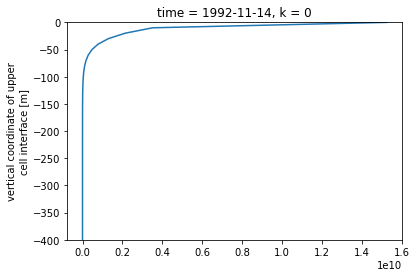

In [216]:
swdown.sum(dim=['i', 'j']).plot(y='Zl')
plt.ylim([-400, 0])

which one am I using `sw` or `swdown`?

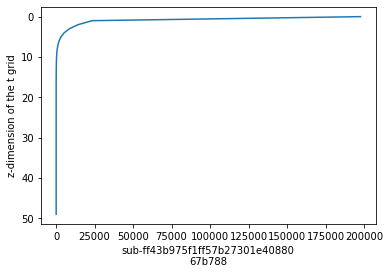

In [65]:
sw.isel(j=100, i=100).plot(y='k', yincrease=False)

In [125]:
#w.o `_,` the return would've been the two arrays - hFacC and surf_flux_th - so here, we only want surf_flux_th returned
_, surf_flux_th_aligned = xr.align(coords.hFacC, surf_flux_th.expand_dims('k'), join='outer')
surf_flux_th_aligned = surf_flux_th_aligned.fillna(0.)

In [133]:
rhs =  (surf_flux_th_aligned 
        + budget_th.conv_horiz_adv_flux_TH + budget_th.conv_vert_adv_flux_TH
        + budget_th.conv_horiz_diff_flux_TH + budget_th.conv_vert_diff_flux_TH
        + sw)
lhs = total_tend_short

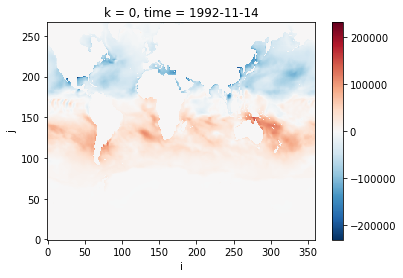

In [140]:
rhs.isel(j=slice(0,-3))[0].load().plot()

/srv/conda/envs/notebook/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)


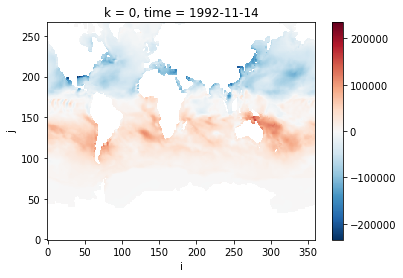

In [141]:
lhs.isel(j=slice(0,-3))[0].load().plot()

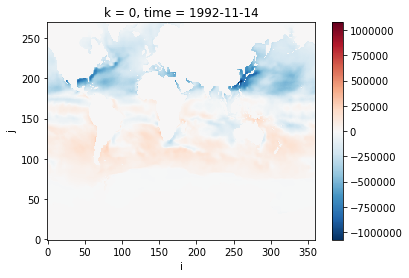

In [113]:
(surf_flux_th_aligned[0] + sw[:, :, 0]).load().plot()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
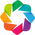

In [152]:
import datashader as ds
import holoviews as hv
from holoviews.operation.datashader import datashade, shade, dynspread, rasterize
from holoviews import opts
hv.extension('bokeh')

In [161]:
points = hv.Points((rhs.isel(j=slice(0,-3)).values.ravel(),
                    lhs.isel(j=slice(0,-3)).values.ravel()),label="Points")


/srv/conda/envs/notebook/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)


In [176]:
extent = 5e5
one2one_curve = hv.Curve([[-extent, -extent], [extent, extent]], label='1:1')

In [177]:
b = datashade(points)
b.opts(width=800, height=800) * one2one_curve.opts(color='red', width=1)
# y-axis is lhs and x-axis is rhs, they seem to closely match but there are some strange error signals.
#this is a great plot to show you how well your lhs matches the rhs! (Should do this for all budgets!)

:DynamicMap   []
   :Overlay
      .RGB.Points        :RGB   [x,y]   (R,G,B,A)
      .Curve.A_1_colon_1 :Curve   [x]   (y)

In [184]:
bad_pts = abs(rhs - lhs) > 5000
bad_pts

<xarray.DataArray (k: 50, j: 270, i: 360)>
dask.array<gt, shape=(50, 270, 360), dtype=bool, chunksize=(49, 88, 89), chunktype=numpy.ndarray>
Coordinates:
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
    time     datetime64[ns] 1992-11-14
Dimensions without coordinates: j, i

/srv/conda/envs/notebook/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/srv/conda/envs/notebook/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in greater
  return func(*args2)


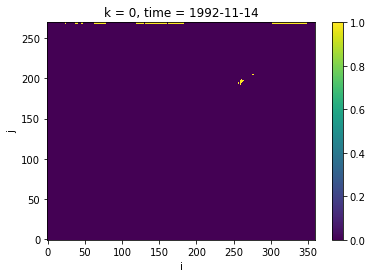

In [185]:
#error seems to be in the arctic cap and some other coastal feature
bad_pts[0].load().plot()

/srv/conda/envs/notebook/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/srv/conda/envs/notebook/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in greater
  return func(*args2)


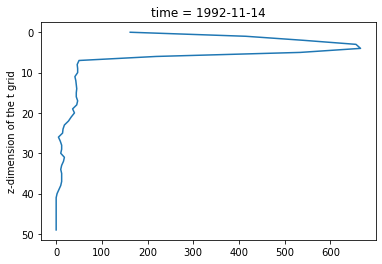

In [186]:
#error greatest at depth z=~5
bad_pts.sum(dim=['j', 'i']).plot(y='k', yincrease=False)

/srv/conda/envs/notebook/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/srv/conda/envs/notebook/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in greater
  return func(*args2)


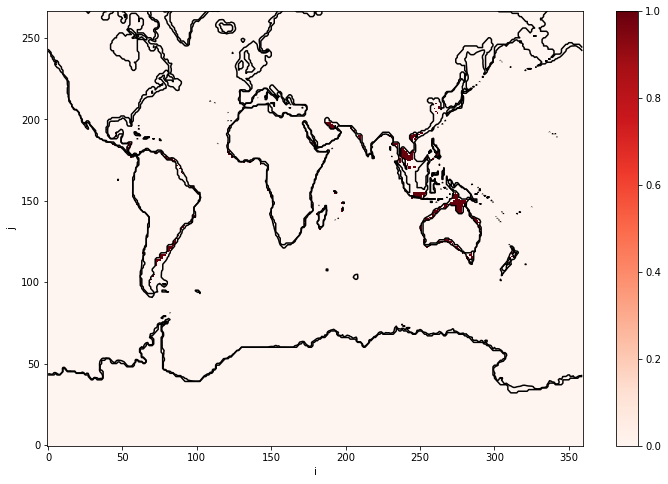

In [194]:
#error seems to be in the shortwave term where there is shallow waters. 
#What does MITgcm do when the water column depth is shorter than the depth of sw penetration (200m)?
#lhs doesn't have zeroes bc we didn't create it to fill rest of water columns with 0s, but rhs does when we created the sw term.
bad_pts.isel(j=slice(0,-3), k=5).load().plot(figsize=(12, 8), cmap='Reds')
coords.Depth.plot.contour(levels=[0, 200], colors='k')

In [201]:
zero_pts = (abs(lhs) < 1) & (rhs > 0)

In [205]:
zero_pts.coords['Z'] = coords.Z

/srv/conda/envs/notebook/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/srv/conda/envs/notebook/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in less
  return func(*args2)


(-400, 0)

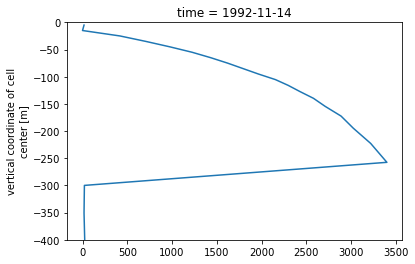

In [207]:
#not sure what's happening here - there are 0s all the way down to 300m?
zero_pts.sum(dim=['j', 'i']).plot(y='Z')
plt.ylim([-400, 0])

/srv/conda/envs/notebook/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/srv/conda/envs/notebook/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/srv/conda/envs/notebook/lib/python3.7/site-packages/xarray/plot/plot.py:914: UserWarning: No contour levels were found within the data range.
  primitive = ax.contour(x, y, z, **kwargs)


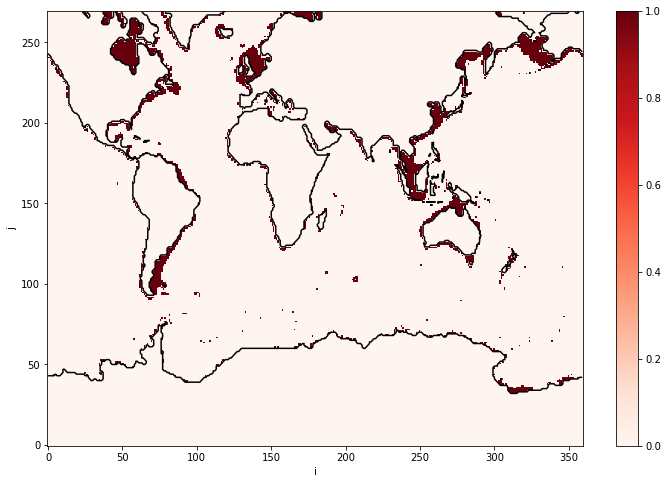

In [203]:
#at the bottom depth of sw penetration we see 0s in the regions with shallow water columns
#Ryan suspects MITgcm subtracts the bottom-most level from the top-most level of sw value and dumps that value in the bottom layer?
zero_pts.isel(k=18).plot(cmap='Reds', figsize=(12, 8))
coords.Depth.plot.contour(levels=[0, 0], colors='k')

In [72]:
surf_flux_th.expand_dims('k')

<xarray.DataArray (k: 1, j: 270, i: 360)>
dask.array<broadcast_to, shape=(1, 270, 360), dtype=float32, chunksize=(1, 90, 90), chunktype=numpy.ndarray>
Coordinates:
    time     datetime64[ns] 1992-11-14
  * k        (k) int64 0
Dimensions without coordinates: j, i

In [38]:
lhs

<xarray.DataArray ()>
dask.array<sum-aggregate, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>
Coordinates:
    time     datetime64[ns] 1992-11-14

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([7.79551573e+08, 7.79551574e+08, 7.79551574e+08, 7.79551574e+08,
        7.79551574e+08, 7.79551574e+08, 7.79551574e+08, 7.79551574e+08,
        7.79551574e+08, 7.79551574e+08, 7.79551574e+08]),
 <a list of 10 Patch objects>)

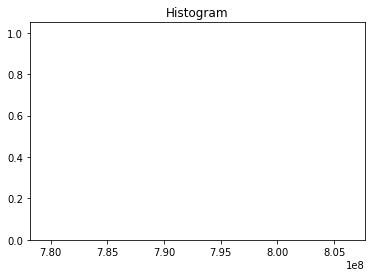

In [39]:
rhs.plot()
lhs.plot()

In [ ]:
# from original notebook
t_flux_z = (ds.TFLUX * coords.rA * coords.hFacC.isel(k=0)).isel(**lat_range, **lon_range).sum(dim=['i','j'])
t_flux_z.load()
surface_term = t_flux_z / (heat_capacity_cp * runit2mass)
surface_term

In [ ]:
a.plot(figsize=(12, 5))
b.plot()

In [ ]:
surf_flux_th_sw * swfrac(coords)

In [ ]:
conv_all = sum(budget_th.data_vars.values())
conv_all_sum_k = conv_all.sum(dim='k').load()

In [ ]:
conv_all_sum_k

In [ ]:
surf_flux_th

In [ ]:
-grid.diff(swdown, 'Z', boundary='fill').fillna(0.)

In [17]:
budget_surf_th = xr.merge([surf_flux_th.rename('surface_flux_conv_TH'),
                           (-grid.diff(swdown, 'Z', boundary='fill').fillna(0.)
                           ).rename('sw_flux_conv_TH')])
budget_surf_th

<xarray.Dataset>
Dimensions:               (i: 360, j: 270, k: 50, time: 288)
Coordinates:
  * time                  (time) datetime64[ns] 1992-01-15 ... 2015-12-14
  * k                     (k) int64 0 1 2 3 4 5 6 7 ... 42 43 44 45 46 47 48 49
Dimensions without coordinates: i, j
Data variables:
    surface_flux_conv_TH  (time, j, i) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    sw_flux_conv_TH       (time, j, i, k) float32 dask.array<chunksize=(1, 90, 90, 49), meta=np.ndarray>

In [18]:
budget_surf_th['sw_flux_conv_TH'] = budget_surf_th.sw_flux_conv_TH.where(budget_surf_th.sw_flux_conv_TH.k!=49, other=0)

In [19]:
budget_surf_th

<xarray.Dataset>
Dimensions:               (i: 360, j: 270, k: 50, time: 288)
Coordinates:
  * time                  (time) datetime64[ns] 1992-01-15 ... 2015-12-14
  * k                     (k) int64 0 1 2 3 4 5 6 7 ... 42 43 44 45 46 47 48 49
Dimensions without coordinates: i, j
Data variables:
    surface_flux_conv_TH  (time, j, i) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    sw_flux_conv_TH       (time, j, i, k) float32 dask.array<chunksize=(1, 90, 90, 49), meta=np.ndarray>

/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


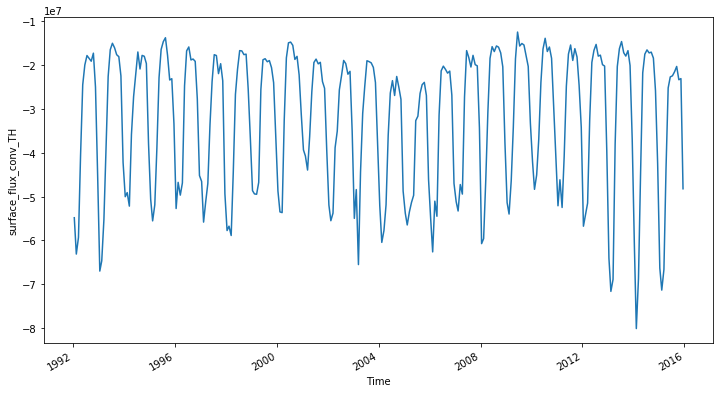

In [29]:
budget_surf_th.surface_flux_conv_TH.isel(**lat_range, **lon_range).sum(dim=['i', 'j']).plot(figsize=(12,6))

In [27]:
lower_lat = 35 #9
upper_lat = 75 #44
left_lon = 75 #21
right_lon = 167 #120

In [28]:
#set the boundaries
lat_range = dict(j=slice(lower_lat, upper_lat))
lon_range = dict(i=slice(left_lon, right_lon))

In [10]:
ds_wg = ds.isel(**lat_range, **lon_range)
ds_wg_surf = ds_surf.isel(**lat_range, **lon_range)

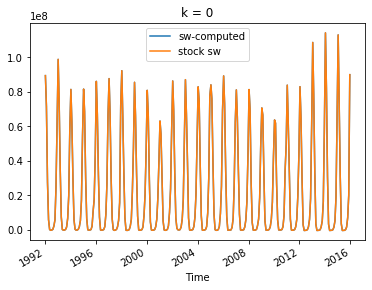

In [31]:
budget_surf_th.sw_flux_conv_TH.isel(**lat_range, **lon_range).where(budget_surf_th.sw_flux_conv_TH.k!=49, other=0).sum(
                                                                            dim=['i', 'j', 'k']).plot(label='sw-computed')
surf_flux_th_sw.isel(**lat_range, **lon_range).sum(dim=['i', 'j']).plot(label='stock sw')
plt.legend();

In [32]:
budget_th['theta'] = ds.THETA

budget_th = budget_th.chunk({'i': -1, 'j': -1, 'k': -1, 'time': 1})
budget_th

<xarray.Dataset>
Dimensions:                  (i: 360, j: 270, k: 50, time: 288)
Coordinates:
  * time                     (time) datetime64[ns] 1992-01-15 ... 2015-12-14
  * k                        (k) int64 0 1 2 3 4 5 6 7 ... 43 44 45 46 47 48 49
Dimensions without coordinates: i, j
Data variables:
    conv_horiz_adv_flux_TH   (time, k, j, i) float32 dask.array<chunksize=(1, 50, 270, 360), meta=np.ndarray>
    conv_horiz_diff_flux_TH  (time, k, j, i) float32 dask.array<chunksize=(1, 50, 270, 360), meta=np.ndarray>
    conv_vert_adv_flux_TH    (time, k, j, i) float32 dask.array<chunksize=(1, 50, 270, 360), meta=np.ndarray>
    conv_vert_diff_flux_TH   (time, k, j, i) float32 dask.array<chunksize=(1, 50, 270, 360), meta=np.ndarray>
    total_tendency_TH_truth  (time, k, j, i) float64 dask.array<chunksize=(1, 50, 270, 360), meta=np.ndarray>
    theta                    (time, k, j, i) float32 dask.array<chunksize=(1, 50, 270, 360), meta=np.ndarray>

In [27]:
budget_slt['salt'] = ds.SALT
budget_slt['salt_snp'] = ds.SALT_snp

budget_slt = budget_slt.chunk({'i': -1, 'j': -1, 'k': -1, 'time': 1})
budget_slt

<xarray.Dataset>
Dimensions:                   (i: 360, j: 270, k: 50, time: 288, time_snp: 287)
Coordinates:
  * time                      (time) datetime64[ns] 1992-01-15 ... 2015-12-14
  * k                         (k) int64 0 1 2 3 4 5 6 7 ... 43 44 45 46 47 48 49
  * time_snp                  (time_snp) datetime64[ns] 1992-02-01 ... 2015-12-01
Dimensions without coordinates: i, j
Data variables:
    conv_horiz_adv_flux_SLT   (time, k, j, i) float32 dask.array<chunksize=(1, 50, 270, 360), meta=np.ndarray>
    conv_horiz_diff_flux_SLT  (time, k, j, i) float32 dask.array<chunksize=(1, 50, 270, 360), meta=np.ndarray>
    conv_vert_adv_flux_SLT    (time, k, j, i) float32 dask.array<chunksize=(1, 50, 270, 360), meta=np.ndarray>
    conv_vert_diff_flux_SLT   (time, k, j, i) float32 dask.array<chunksize=(1, 50, 270, 360), meta=np.ndarray>
    total_tendency_SLT_truth  (time, k, j, i) float64 dask.array<chunksize=(1, 50, 270, 360), meta=np.ndarray>
    salt_plume                (time, k, j, i) float32 dask.array<chunksize=(1, 50, 270, 360), meta=np.ndarray>
    surface_flux_SLT          (time, j, i) float32 dask.array<chunksize=(1, 270, 360), meta=np.ndarray>
    salt                      (time, k, j, i) float32 dask.array<chunksize=(1, 50, 270, 360), meta=np.ndarray>
    salt_snp                  (time_snp, k, j, i) float32 dask.array<chunksize=(1, 50, 270, 360), meta=np.ndarray>

## Saving Data

In [20]:
gcfs_auth = gcsfs.GCSFileSystem(project='pangeo-181919', token='browser')
token = gcfs_auth.tokens[('pangeo-181919', 'full_control')]
gcfs_w_token = gcsfs.GCSFileSystem(project='pangeo-181919', token=token)

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=586241054156-9kst7ltfj66svc342pcn43vp6ta3idin.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&state=bHqGTd9csuto8vKgULSTY4NuLYN0uz&prompt=consent&access_type=offline


Enter the authorization code:  4/wAFrg6M31l5CYphU2ehJptRFIeNBQKu64LRe84GM-8EQCSx41NEDcaw


In [28]:
#saving heat budget ds
gcsmap_th = gcfs_w_token.get_mapper('pangeo-tmp/stb2145/ECCO/budget_th.zarr')
budget_th.to_zarr(gcsmap_th, mode='w')

In [29]:
#saving salt budget ds
gcsmap_slt = gcfs_w_token.get_mapper('pangeo-tmp/stb2145/ECCO/budget_slt.zarr')
budget_slt.to_zarr(gcsmap_slt, mode='w')

In [21]:
#saving heat surface terms ds
gcsmap_surf_th = gcfs_w_token.get_mapper('pangeo-tmp/stb2145/ECCO/budget_surf_th.zarr')
budget_surf_th.to_zarr(gcsmap_surf_th, mode='w')